In [2]:
# Imports 

import numpy as np 
import pandas as pd 
import os 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
# Import Dataset 

data = pd.read_csv('./Datasets/creditcard.csv')
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# encoding the dataset to integers using an encoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] =  le.fit_transform(data[col])

In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = data.drop(columns=['class'])
y = data['class']

print(X.shape,y.shape)

(284807, 30) (284807,)


In [7]:
# splitting the data

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,stratify=y)

# Regular Tree

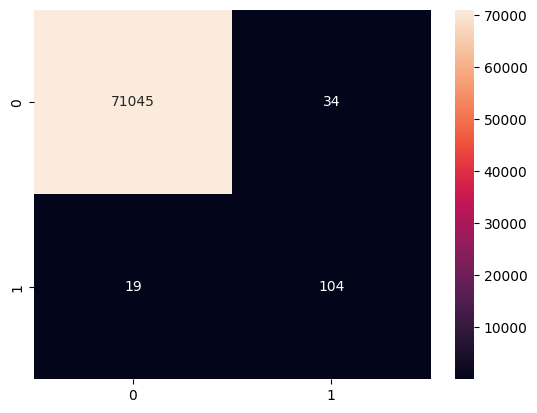

Regular Tree ACC: 0.9992556388865481


In [8]:
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(X_tr,y_tr)

y_pred = clf.predict(X_ts)
cm  = confusion_matrix(y_ts,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print('Regular Tree ACC:',accuracy_score(y_ts,y_pred))

# Pruned Tree

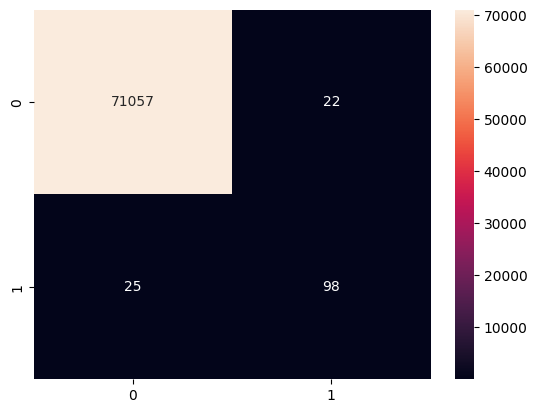

Pruned Tree ACC: 0.9993399061824106


In [9]:
# pruning the tree 

pr_clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2)
pr_clf.fit(X_tr, y_tr)

y_pred = pr_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Pruned Tree ACC:',accuracy_score(y_ts,y_pred))



# Random Forest

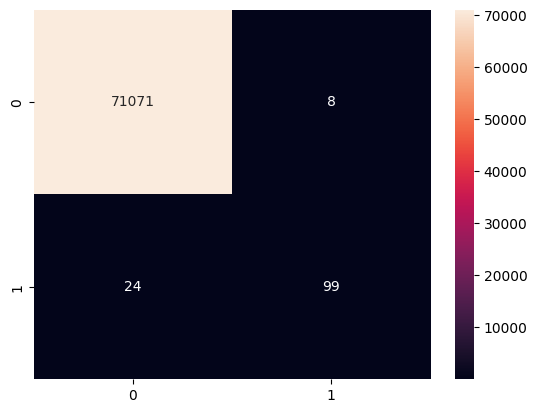

Random Forest ACC: 0.9995505744220669


In [11]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=7)

rf_clf.fit(X_tr,y_tr)

y_pred = rf_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Random Forest ACC:',accuracy_score(y_ts,y_pred))
